In [72]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MaxAbsScaler
from scipy import stats

In [2]:
df = pd.read_csv('player_dataset.csv')

In [3]:
df['SALARY'] = df['SALARY'].map(lambda x: x.replace('$','').replace(',','')).astype(int)

In [4]:
df.select_dtypes(include='O')

,name,Team_y,Position_y,HANDED,TOI_x,CLAUSE,EXPIRY,CAPHIT,CAP HIT %
0,Zemgus Girgensons,BUF,C,Left,13:47,NaN,UFA,"$1,600,000",2.00%
1,Zack Smith,CHI,C,Left,11:47,M-NTC,UFA,"$3,250,000",4.50%
2,Zack Kassian,EDM,W,Right,15:39,NaN,UFA,"$1,950,000",2.60%
3,Zach Parise,MIN,W,Left,17:11,NMC,UFA,"$7,538,461",12.60%
4,Zach Hyman,TOR,W,Right,19:05,M-NTC,UFA,"$2,250,000",3.00%
...,...,...,...,...,...,...,...,...,...
563,Adam Larsson,EDM,D,Right,19:49,NaN,UFA,"$4,166,666",5.80%
564,Adam Henrique,ANA,C,Left,16:52,M-NTC,UFA,"$5,825,000",7.30%
565,Adam Erne,DET,W,Left,11:48,NaN,UFANo QO,"$1,050,000",1.30%
566,Aaron Ness,ARI,D,Left,12:32,NaN,UFA,"$725,000",0.90%


In [25]:
df['Team2']=None
df['Team3']=None
for i in range(len(df)):
    if len(df['Team_y'].iloc[i].split()) == 2:
        df['Team2'].iloc[i] == df['Team_y'].iloc[i].split()[1]
    elif len(df['Team_y'].iloc[i].split()) == 3:
        df['Team2'].iloc[i] == df['Team_y'].iloc[i].split()[1]
        df['Team3'].iloc[i] == df['Team_y'].iloc[i].split()[2]

In [26]:
df

,RFA,UFA,UFAGroup 6,UFANo QO,M-NTC,"M-NTC, NMC",NMC,NTC,Left,Right,...,xGF_perc,PIM,Giveaways,Takeaways,Hits,Hits Taken,blocked_shots,Team2,Team3,traded
0,False,True,False,False,False,False,False,False,True,False,...,40.84,10,11,13,110,71,20,None,None,False
1,False,True,False,False,True,False,False,False,True,False,...,39.88,29,14,21,112,71,18,None,None,False
2,False,True,False,False,False,False,False,False,False,True,...,47.26,69,45,26,157,54,8,None,None,False
3,False,True,False,False,False,False,True,False,True,False,...,57.12,8,22,21,27,60,38,None,None,False
4,False,True,False,False,True,False,False,False,False,True,...,53.20,23,16,32,52,101,23,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,False,True,False,False,False,False,False,False,False,True,...,46.48,35,35,16,112,65,82,None,None,False
564,False,True,False,False,True,False,False,False,True,False,...,55.59,20,32,26,75,40,32,None,None,False
565,False,False,False,True,False,False,False,False,True,False,...,43.11,28,27,5,142,32,25,None,None,False
566,False,True,False,False,False,False,False,False,True,False,...,50.27,0,8,1,17,49,20,None,None,False


In [7]:
dummies = []
for col in df.select_dtypes(include='O').drop(['CAP HIT %','TOI_x','CAPHIT','Team_y'],axis=1).columns[1:]:
    dummies.append(pd.get_dummies(df[col]))

In [8]:
for d in dummies:
    df=pd.concat([d,df],axis=1)

In [9]:
df

,RFA,UFA,UFAGroup 6,UFANo QO,M-NTC,"M-NTC, NMC",NMC,NTC,Left,Right,...,FF_perc,xGF_perc,PIM,Giveaways,Takeaways,Hits,Hits Taken,blocked_shots,Team2,Team3
0,False,True,False,False,False,False,False,False,True,False,...,41.89,40.84,10,11,13,110,71,20,None,None
1,False,True,False,False,True,False,False,False,True,False,...,41.46,39.88,29,14,21,112,71,18,None,None
2,False,True,False,False,False,False,False,False,False,True,...,49.47,47.26,69,45,26,157,54,8,None,None
3,False,True,False,False,False,False,True,False,True,False,...,52.41,57.12,8,22,21,27,60,38,None,None
4,False,True,False,False,True,False,False,False,False,True,...,50.23,53.20,23,16,32,52,101,23,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,False,True,False,False,False,False,False,False,False,True,...,45.35,46.48,35,35,16,112,65,82,None,None
564,False,True,False,False,True,False,False,False,True,False,...,54.92,55.59,20,32,26,75,40,32,None,None
565,False,False,False,True,False,False,False,False,True,False,...,44.87,43.11,28,27,5,142,32,25,None,None
566,False,True,False,False,False,False,False,False,True,False,...,49.65,50.27,0,8,1,17,49,20,None,None


In [10]:
convert_cols = ['CAP HIT %','TOI_x','CAPHIT','Team_y']

In [11]:
df['CAP HIT %']=df['CAP HIT %'].map(lambda x: x.replace('%',''))

In [12]:
df['CAP HIT %']=df['CAP HIT %'].astype(float)/100

In [13]:
df['TOI_x']=df['TOI_x'].map(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1])*1)

In [15]:
df['TOI_x'][0:2]

0    827
1    707
Name: TOI_x, dtype: int64

In [17]:
df['CAPHIT']=df['CAPHIT'].map(lambda x:int(x.replace(',','').replace('$','')))

In [18]:
df.head()

,RFA,UFA,UFAGroup 6,UFANo QO,M-NTC,"M-NTC, NMC",NMC,NTC,Left,Right,...,FF_perc,xGF_perc,PIM,Giveaways,Takeaways,Hits,Hits Taken,blocked_shots,Team2,Team3
0,False,True,False,False,False,False,False,False,True,False,...,41.89,40.84,10,11,13,110,71,20,None,None
1,False,True,False,False,True,False,False,False,True,False,...,41.46,39.88,29,14,21,112,71,18,None,None
2,False,True,False,False,False,False,False,False,False,True,...,49.47,47.26,69,45,26,157,54,8,None,None
3,False,True,False,False,False,False,True,False,True,False,...,52.41,57.12,8,22,21,27,60,38,None,None
4,False,True,False,False,True,False,False,False,False,True,...,50.23,53.20,23,16,32,52,101,23,None,None


In [23]:
df['traded']=False
for i in range(len(df)):
    if len(df.Team_y.iloc[i].split()) > 1:
        df['traded'].iloc[i] = True

In [27]:
df.head()

,RFA,UFA,UFAGroup 6,UFANo QO,M-NTC,"M-NTC, NMC",NMC,NTC,Left,Right,...,xGF_perc,PIM,Giveaways,Takeaways,Hits,Hits Taken,blocked_shots,Team2,Team3,traded
0,False,True,False,False,False,False,False,False,True,False,...,40.84,10,11,13,110,71,20,None,None,False
1,False,True,False,False,True,False,False,False,True,False,...,39.88,29,14,21,112,71,18,None,None,False
2,False,True,False,False,False,False,False,False,False,True,...,47.26,69,45,26,157,54,8,None,None,False
3,False,True,False,False,False,False,True,False,True,False,...,57.12,8,22,21,27,60,38,None,None,False
4,False,True,False,False,True,False,False,False,False,True,...,53.20,23,16,32,52,101,23,None,None,False


In [32]:
#df.to_pickle('df1.pkl')

In [33]:
######### START HERE ##########

In [30]:
df = pd.read_pickle('pickles/df1.pkl')

In [36]:
for col in df:
    try:
        df[col] = df[col].astype(float)
    except:
        print('hey babe')

hey babe
hey babe
hey babe
hey babe
hey babe
hey babe


In [38]:
df.fillna(0,inplace=True)

In [39]:
df.head()

,RFA,UFA,UFAGroup 6,UFANo QO,M-NTC,"M-NTC, NMC",NMC,NTC,Left,Right,...,xGF_perc,PIM,Giveaways,Takeaways,Hits,Hits Taken,blocked_shots,Team2,Team3,traded
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,40.84,10.0,11.0,13.0,110.0,71.0,20.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,39.88,29.0,14.0,21.0,112.0,71.0,18.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,47.26,69.0,45.0,26.0,157.0,54.0,8.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,57.12,8.0,22.0,21.0,27.0,60.0,38.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,53.20,23.0,16.0,32.0,52.0,101.0,23.0,0.0,0.0,0.0


In [40]:
# correlation and scaling

In [44]:
df=df.select_dtypes(exclude='O')

<Axes: >

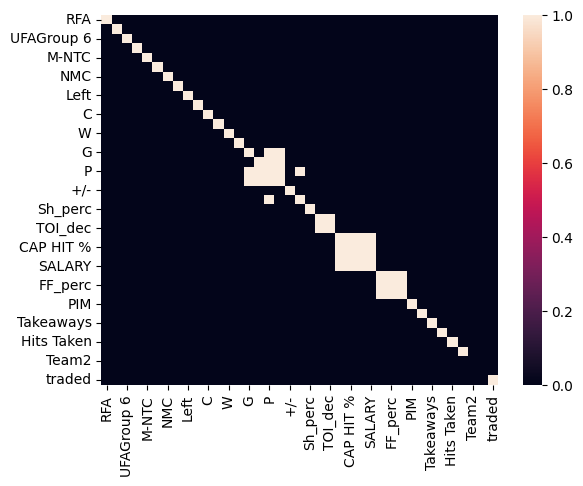

In [46]:
sns.heatmap(df.corr()>=0.85)

In [48]:
df.drop('CAPHIT',axis=1,inplace=True)

In [49]:
df.drop('CAP HIT %',axis=1,inplace=True)

<Axes: >

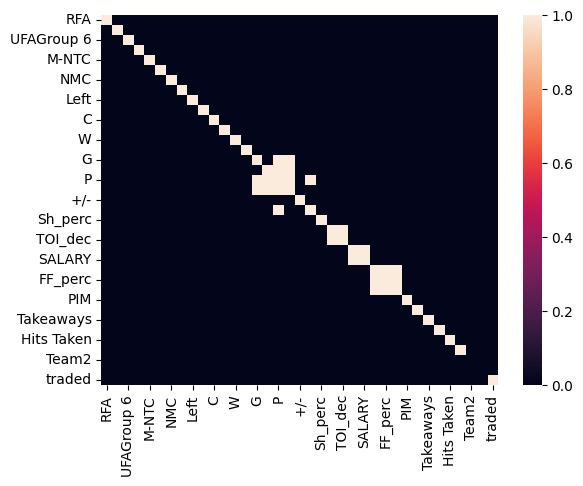

In [50]:
sns.heatmap(df.corr()>=0.85)

In [51]:
df['goal_pct']=df['G']/df['P']
df['assists']=df['P']-df['G']
df['ast_pct']=df['assists']/df['P']

In [53]:
df.drop(['assists','G'],axis=1,inplace=True)

<Axes: >

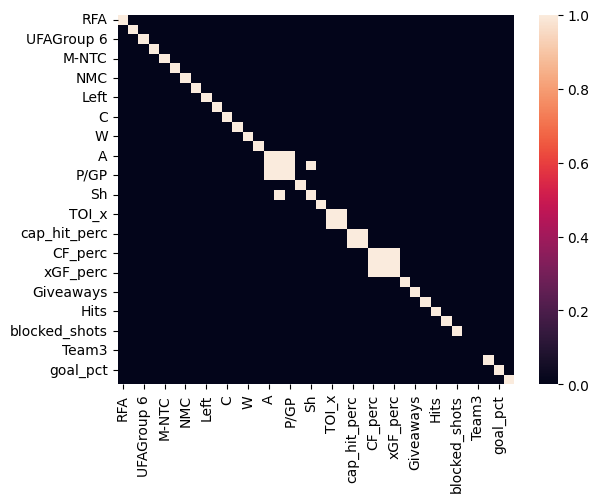

In [54]:
sns.heatmap(df.corr()>=0.85)

In [55]:
df.drop('P/GP',axis=1,inplace=True)

<Axes: >

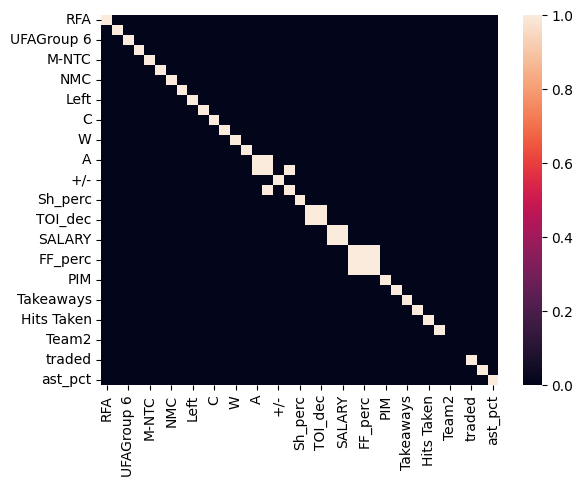

In [56]:
sns.heatmap(df.corr()>=0.85)

In [57]:
df.drop('Sh_perc',axis=1,inplace=True)

In [58]:
df.drop('FF_perc',axis=1,inplace=True)

<Axes: >

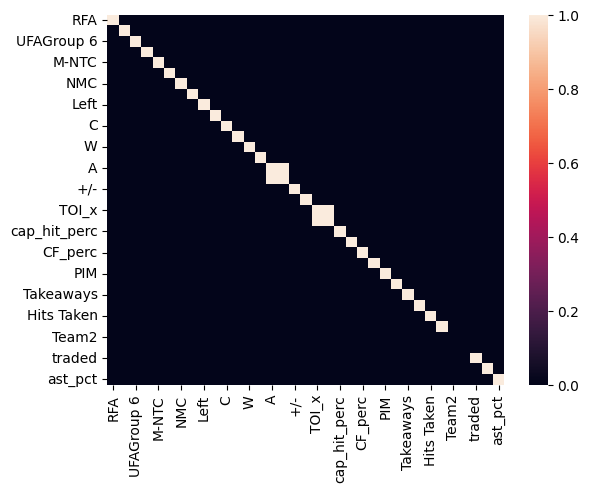

In [60]:
sns.heatmap(df.corr()>=0.95)

In [61]:
df.drop('+/-',axis=1,inplace=True)
df.drop('cap_hit_perc',axis=1,inplace=True)

<Axes: >

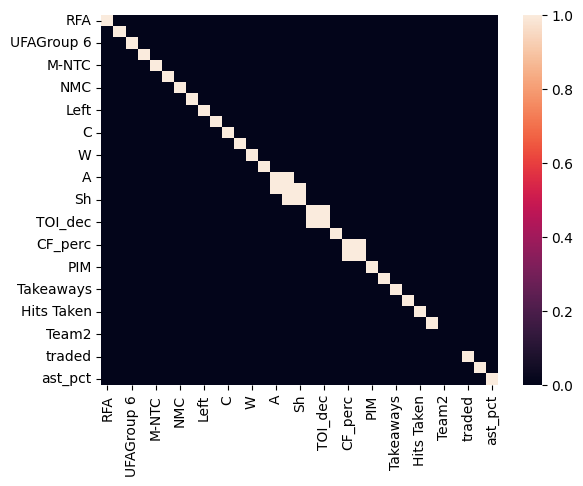

In [62]:
sns.heatmap(df.corr()>=0.85)

In [64]:
df.drop('Sh',axis=1,inplace=True)
df.drop('CF_perc',axis=1,inplace=True)

<Axes: >

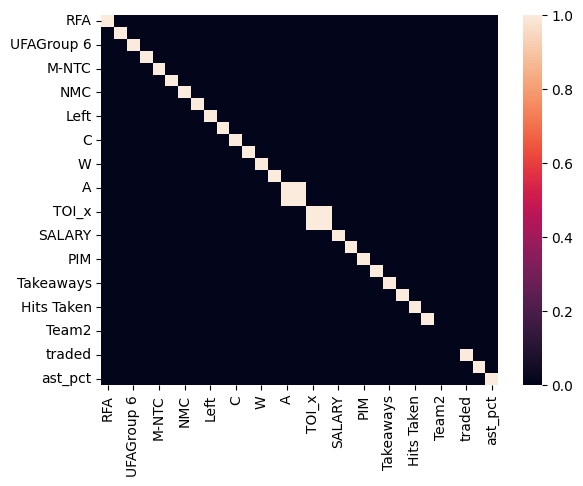

In [65]:
sns.heatmap(df.corr()>=0.85)

In [67]:
#df.to_pickle('pickles/df2.pkl')

In [68]:
df = pd.read_pickle('pickles/df3.pkl')

In [69]:
# outliers and scaling

In [1]:
df.head()

NameError: name 'df' is not defined

In [2]:
# next